In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName="advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter =',', skip_header =1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]
  features_X = np.column_stack((np.ones(features_X.shape[0]), features_X))
  return features_X, sales_Y

In [2]:
features_X, _ = load_data_from_file()
print(features_X[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [3]:
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [4]:
def create_individual(n=4, bound=10) :
  individual = []
  # *************** Your code here *******
  individual = [(np.random.rand() - 0.5) * bound for _ in range(n)]
  return individual
individual = create_individual ()
print(individual)
# sample result: [[4.097462559682401, 4.827854760376531, 3.1021723599658957, 4.021659504395827]]

[4.8119013409313025, 1.1695540589202857, -2.0585025840988047, 0.5112815882251465]


In [5]:
features_X, sales_Y = load_data_from_file()

def compute_loss(individual):
  theta = np.array(individual)
  y_hat = features_X.dot(theta)
  loss = np.multiply((y_hat - sales_Y), (y_hat - sales_Y)).mean()
  return loss

def compute_fitness(individual):
  loss = compute_loss(individual)
  fitness_value = 0
  # ************ your code here ************
  fitness_value = 1 / (loss + 1)
  return fitness_value  

In [6]:
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)


1.0185991537088997e-06


In [7]:
def crossover(individual1, individual2, crossover_rate=0.9):
  individual1_new = individual1.copy()
  individual2_new = individual2.copy()
  # *************** Your code here **************
  if np.random.rand() < crossover_rate:
    point = 1
    individual1_new[point:], individual2_new[point:] = individual2[point:], individual1[point:]
  return individual1_new, individual2_new

In [8]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1:", individual1)
print("individual2:", individual2)

individual1: [4.09, 2.57, -0.79, -2.41]
individual2: [3.44, 4.82, 3.1, 4.02]


In [9]:
def mutate(individual, mutation_rate=0.05) :
  individual_m = individual.copy()
  # ******** Your code here ******************
  if np.random.rand() < mutation_rate:
    individual_m = individual_m + (np.random.rand(4) * 2 - 1) * 0.1
  return individual_m

In [10]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

[False False False False]


In [11]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [12]:
def selection(sorted_old_population, m=100):
  index1 = random.randint(0, m - 1)
  
  while True:
    index2 = random.randint(0, m - 1)
    if index2 != index1:
      break

  individual_s = sorted_old_population[index1]
  
  if index2 > index1:
    individual_s = sorted_old_population[index2]
  
  return individual_s

In [13]:
def create_new_population(old_population, elitism=2, gen=1):
  m = len(old_population)
  sorted_population = sorted(old_population, key=compute_fitness)
  
  if gen % 1 == 0:
    print("Best loss:", compute_loss(sorted_population[m - 1]), "with chromosome:", sorted_population[m - 1])
  
  new_population = []
  
  while len(new_population) < m - elitism:
    # Selection
    # **************** your code here ****************
    individual1 = selection(sorted_population, m)
    individual2 = selection(sorted_population, m)
    # Crossover
    # **************** your code here ****************
    new_cross1, new_cross2 = crossover(individual1, individual2)    
    # Mutation
    # **************** your code here ****************
    new_mutation1 = mutate(new_cross1)
    new_mutation2 = mutate(new_cross2)
    if not np.array_equal(new_mutation1, individual1):
      new_population.append(new_mutation1)
    if not np.array_equal(new_mutation2, individual2):
      if len(new_population) < m - elitism:
        new_population.append(new_mutation2)
  # Copy elitism chromosomes that have the best fitness score to the next generation
  for ind in sorted_population[m - elitism:]:
    # **************** your code here ****************
    new_population.append(ind)
  return new_population, compute_loss(sorted_population[m - 1])


In [14]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population , _ = create_new_population(old_population,elitism=2, gen=1)

Best loss: 123415.051528805 with chromosome: [3.44, 2.57, -0.79, -2.41]


In [15]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []

  for i in range(n_generations):
    # *********** your code here *************
    population = sorted(population, key=compute_fitness)
    best_loss = compute_loss(population[-1])
    losses_list.append(best_loss)
    new_population, _ = create_new_population(population)
    population = new_population

  return losses_list, population


Best loss: 297.6742022820423 with chromosome: [-0.8317640520204961, 0.1722261393035074, -0.8656423416098358, 0.41004573720171855]
Best loss: 297.6742022820423 with chromosome: [-0.8317640520204961, 0.1722261393035074, -0.8656423416098358, 0.41004573720171855]
Best loss: 294.68194403874895 with chromosome: [-2.3030304625455034, 0.1722261393035074, -0.8656423416098358, 0.41004573720171855]
Best loss: 294.61117894046566 with chromosome: [-2.675648529260648, 0.1722261393035074, -0.8656423416098358, 0.41004573720171855]
Best loss: 293.2101023484798 with chromosome: [ 2.95034478  0.16476246 -0.91141379  0.36016454]
Best loss: 237.75992322740237 with chromosome: [ 3.11243439  0.12342503 -0.86718448  0.31300467]
Best loss: 230.57660509489745 with chromosome: [4.002582335562719, 0.12342503398887064, -0.8671844803163212, 0.31300466661526644]
Best loss: 230.57660509489745 with chromosome: [4.002582335562719, 0.12342503398887064, -0.8671844803163212, 0.31300466661526644]
Best loss: 207.11374203617

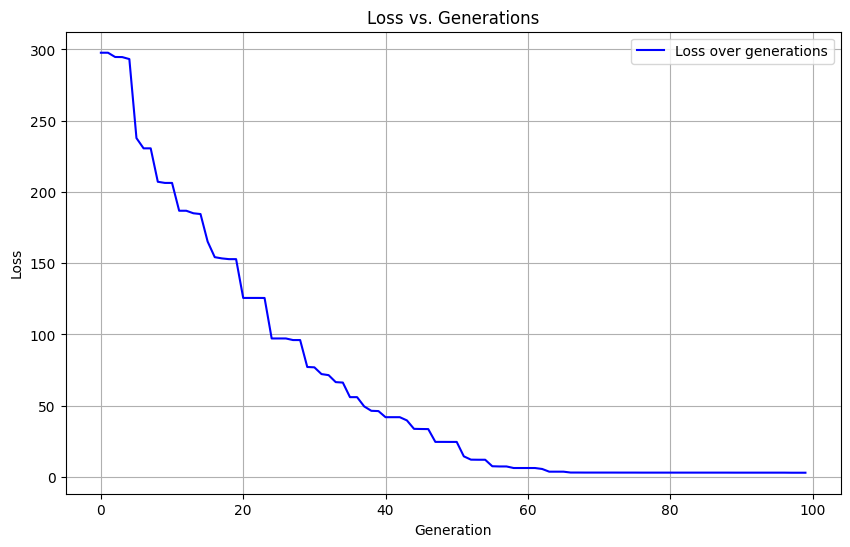

In [16]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
  # *********** your code here *************
  plt.figure(figsize=(10, 6))
  plt.plot(losses_list, label='Loss over generations', color='blue')
  plt.xlabel('Generation')
  plt.ylabel('Loss')
  plt.title('Loss vs. Generations')
  plt.legend()
  plt.grid(True)
  plt.show()


losses_list, population = run_GA()
visualize_loss(losses_list)


Best individual: [4.85937716 0.0495444  0.11599361 0.00913924]


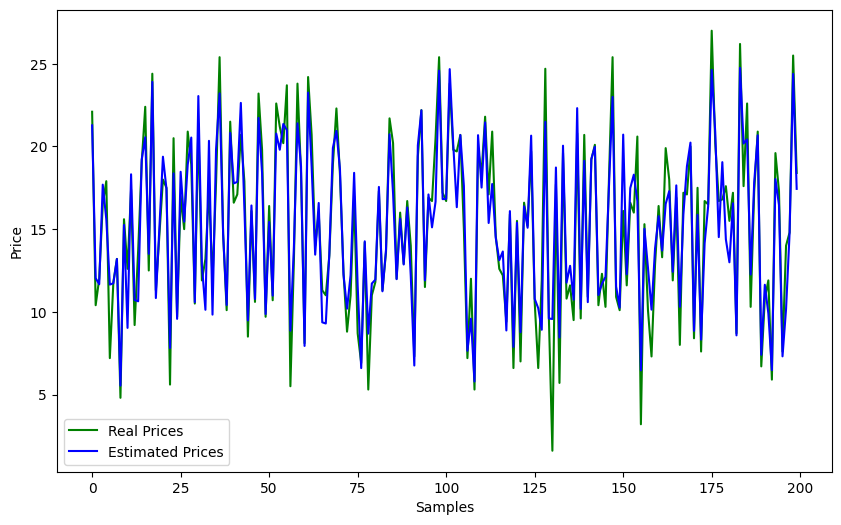

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_predict_gt():
  # Visualization of ground truth and predicted values
  sorted_population = sorted(population, key=compute_fitness)
  print("Best individual:", sorted_population[-1])
  
  theta = np.array(sorted_population[-1])
  estimated_prices = []

  for feature in features_X:
    # ************* your code here *************
    estimated_price = np.dot(feature, theta)
    estimated_prices.append(estimated_price)
  

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, color='green', label='Real Prices')
  plt.plot(estimated_prices, color='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()